### Credit Task 1

##### Part A

#### Data Description: 
The dataset contains 206 attributes of 70 children with physical and motor disability based on ICF-CY.

##### 1. Determine the number of subgroups from the dataset using attributes 3 to 205 i.e., exclude attributes 1, 2 and 206. Is this number the same as the number of classes presented by attribute 206? Explain and justify your findings.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sns.set()
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,ElasticNetCV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.model_selection import KFold,StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
sc = pd.read_csv('SCADI.csv')
print(f"Shape of the Data:{sc.shape}\nNumber of Records:{sc.shape[0]}\nNumber of features:{sc.shape[1]}")
sc.head()

Shape of the Data:(70, 206)
Number of Records:70
Number of features:206


Gender  Age  d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  \
0       0   18         0         0         0         0         1         0   
1       0   22         0         0         0         0         1         0   
2       0   18         0         0         0         1         0         0   
3       1   18         0         0         0         0         1         0   
4       0   19         0         0         0         0         1         0   

   d 5100-9  d 5101-0  ...  d 57022-8  d 57022-9  d 571-0  d 571-1  d 571-2  \
0         0         0  ...          0          0        0        0        0   
1         0         0  ...          0          0        0        0        0   
2         0         0  ...          0          0        0        0        0   
3         0         0  ...          0          0        0        0        1   
4         0         0  ...          0          0        0        0        1   

   d 571-3  d 571-4  d 571-8  d 571-9  Classes  
0        0        1        0        0   class6  
1        1        0        0        0   class6  
2        1        0        0        0   class6  
3        0        0        0        0   class6  
4        0        0        0        0   class6  

[5 rows x 206 columns]

In [3]:
# Checking the columns exclude attributes 1, 2 and 206
sc.columns[2:-1]

Index(['d 5100-0', 'd 5100-1', 'd 5100-2', 'd 5100-3', 'd 5100-4', 'd 5100-8',
       'd 5100-9', 'd 5101-0', 'd 5101-1', 'd 5101-2',
       ...
       'd 57022-4', 'd 57022-8', 'd 57022-9', 'd 571-0', 'd 571-1', 'd 571-2',
       'd 571-3', 'd 571-4', 'd 571-8', 'd 571-9'],
      dtype='object', length=203)

In [4]:
len(sc.columns[2:-1])

203

In [5]:
print(f"SHape of the Dataset:{sc.shape}")

SHape of the Dataset:(70, 206)


In [6]:
print(f"Unique labels in classes column: {sc['Classes'].unique()}")
print(f"Unique number of labels in classes column: {sc['Classes'].nunique()}")

Unique labels in classes column: ['class6' 'class2' 'class4' 'class7' 'class1' 'class5' 'class3']
Unique number of labels in classes column: 7


In [7]:
X = sc.drop(columns = ['Gender','Age','Classes'])
X.shape

(70, 203)

In [8]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X


array([[-0.2773501 , -0.40824829, -0.61036794, ...,  3.26598632,
         0.        ,  0.        ],
       [-0.2773501 , -0.40824829, -0.61036794, ..., -0.30618622,
         0.        ,  0.        ],
       [-0.2773501 , -0.40824829, -0.61036794, ..., -0.30618622,
         0.        ,  0.        ],
       ...,
       [-0.2773501 , -0.40824829, -0.61036794, ..., -0.30618622,
         0.        ,  0.        ],
       [-0.2773501 , -0.40824829, -0.61036794, ..., -0.30618622,
         0.        ,  0.        ],
       [-0.2773501 , -0.40824829, -0.61036794, ..., -0.30618622,
         0.        ,  0.        ]])

In [9]:
wcss = [] # empty list to store distortions for differnt number of clusters
values = range(2,10)
li = []
for k in values:
    kmm = KMeans(n_clusters=k,random_state=42)
    kmm.fit(scaled_X)
    wcss.append(kmm.inertia_)
    li.append(f"For n_clusters = {k},inertia :{kmm.inertia_}")
    

In [10]:
fig = px.line(x=values, y=wcss,title = 'Distortions vs number of clusters',
              labels={"x":"Number_of_clusters","y":"Distortions"},
              height=500,width=900,markers=True)
fig.show()

In [11]:
li

['For n_clusters = 2,inertia :8067.6498830395285',
 'For n_clusters = 3,inertia :6944.268517928714',
 'For n_clusters = 4,inertia :6091.816110772894',
 'For n_clusters = 5,inertia :5670.663840404521',
 'For n_clusters = 6,inertia :5271.766858895061',
 'For n_clusters = 7,inertia :4880.495550659746',
 'For n_clusters = 8,inertia :4584.945327728501',
 'For n_clusters = 9,inertia :4464.50887460046']

From the above Graph and list, It looks as the elbow is made at Cluster : 4 with mean distortion = 6091.81 <br>and Cluster : 7 has mean distortion = 4880.49,<br> with this in mind we could go for clusters 4 or cluster 7 as there is significant decrease of distortion from cluster 3 to cluster 4 and there is not much decrease in distortions between cluster 5 and cluster 4.<br><br>SImilarly From Cluster 6 to cluster 7 there is significant decrease in distortion but not much decrease in distortion from cluster 7 to cluster 8<br><br>So We can have clusters 4 or clusters 7.To check further we will go for Silhoutte Score and the clusters which will have maximum score can be considered the final cluster

In [12]:
sl = []
# values = range(2,50)
for k in values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    predict = kmeans.fit_predict(scaled_X)
    score = silhouette_score(scaled_X,predict,random_state=1)
    sl.append(score)
    print(f"For n_clusters = {k},silhouette score :{score}")

For n_clusters = 2,silhouette score :0.1663380133050078
For n_clusters = 3,silhouette score :0.19336960896484867
For n_clusters = 4,silhouette score :0.21962896326983072
For n_clusters = 5,silhouette score :0.2010513972240522
For n_clusters = 6,silhouette score :0.21375517781568876
For n_clusters = 7,silhouette score :0.2300238873038162
For n_clusters = 8,silhouette score :0.20313742323883902
For n_clusters = 9,silhouette score :0.17900613645430866


In [13]:
fig = px.line(x=values, y=sl,title = 'silhouette score',
              labels={"x":"number_of_clusters","y":"silhouette score"},
              height=500,width=1000,text=values)
fig.show()

From the above Graph, We can see that there are 2 peaks in the graph for cluster 4 and cluster 7 respectively<br>CLuster 7 has a score of 0.23<br>Cluster 4 has a score of 0.21<br><br> This shows that we are more inclined to choose 7 clusters or 7 classes for our problem <br>And the problem statement with given dataset has stated 7 classes itself.<br>

Final Interpretation:--<br>
Initially we have been provided with a  dataset that contains 206 attributes of 70 children with physical and motor disability based on ICF-CY.<br>
This data is segmented into 7 different classes based on 206 features and only 70 records<br>In the modelling technique used, our aim is to divide the children with given features to subgroup them into various classes/segments and able to check the result that is already given in the dataset i.e. the number of 7 classes or not using clustering techniques<br>
Here , Kmeans clustering is used in modelling and to find te optimal number of classes /groups/segments that will be defined by Kmeans Algorithm,<br>Further to determine optimal number of clusters,elbow & Silhoutte score method is used to find the final clusters<br>
From above , the Kmeans algorithm is able to create same number of 7 classes/clusters as it is given in the problem


<br>

##### 2 .Is this data facing the curse of dimensionality? If so, then how to solve this problem. Explain with a two-dimensional plot and report relevant loss of information.

In [14]:
print(f"Shape of the dataset:{sc.shape}")
print(f"Number of Records in the dataset:{sc.shape[0]}")
print(f"Number of Features in the dataset:{sc.shape[1]}")
sc.head(2)

Shape of the dataset:(70, 206)
Number of Records in the dataset:70
Number of Features in the dataset:206


Gender  Age  d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  \
0       0   18         0         0         0         0         1         0   
1       0   22         0         0         0         0         1         0   

   d 5100-9  d 5101-0  ...  d 57022-8  d 57022-9  d 571-0  d 571-1  d 571-2  \
0         0         0  ...          0          0        0        0        0   
1         0         0  ...          0          0        0        0        0   

   d 571-3  d 571-4  d 571-8  d 571-9  Classes  
0        0        1        0        0   class6  
1        1        0        0        0   class6  

[2 rows x 206 columns]

Yes , the data is facing the curse of dimensionalty as the number of records are greater than the number of features.<br>Due to this Some of the difficulties that come with high dimensional data manifest during analyzing or visualizing the data to identify patterns, and some manifest while training machine learning models. The difficulties related to training machine learning models due to high dimensional data are basically known  as the ‘Curse of Dimensionality’.<br>There are basically two facets of Curse of dimensionality :--

##### Data Sparsity-,
the available training samples may not have observed targets for all combinations of the attributes. This is because some combination occurs more often than others. Due to this, the training samples available for building the model may not capture all possible combinations. This aspect, where the training samples do not capture all combinations, is referred to as ‘Data sparsity’ or simply ‘sparsity’ in high dimensional data <br>Training a model with sparse data could lead to high-variance or overfitting conditions. This is because while training the model, the model has learnt from the frequently occurring combinations of the attributes and can predict the outcome accurately. In real-time when less frequently occurring combinations are fed to the model, it may not predict the outcome accurately. 


##### Distance Concentration 
Distance concentration refers to the problem of all the pairwise distances between different samples/points in the space converging to the same value as the dimensionality of the data increases. Several machine learning models such as clustering or nearest neighbours’ methods use distance-based metrics to identify similarities or proximity of the samples. Due to distance concentration, the concept of proximity or similarity of the samples may not be qualitatively relevant in higher dimensions.

To mitigate the problems associated with high dimensional data a suite of techniques generally referred to as ‘Dimensionality reduction techniques are used. Dimensionality reduction techniques fall into one of the two categories- <br>‘Feature selection’ or ‘Feature extraction

In feature selection techniques, the attributes are tested for their worthiness and then selected or eliminated. 

##### Low Variance filter:  
In this technique, the variance in the distribution of all the attributes in a dataset is compared and attributes with very low variance are eliminated. Attributes that do not have such much variance will assume an almost constant value and do not contribute to the predictability of the model.

##### High Correlation filter: 
In this technique, the pair wise correlation between attributes is determined. One of the attributes in the pairs that show very high correlation is eliminated and the other retained. The variability in the eliminated attribute is captured through the retained attribute.

##### Multicollinearity: 
In some cases, the high correlation may not be found for pairs of attributes but if each attribute is regressed as a function of others, we may see that variability of some of the attributes are completely captured by the others. This aspect is referred to as multicollinearity and Variance Inflation Factor (VIF) is a popular technique used to detect multicollinearity. Attributes with high VIF values, generally greater than 10, are eliminated.

##### Feature Ranking: 
Decision Tree models such as CART can rank the attributes based on their importance or contribution to the predictability of the model. In high dimensional data, some of the lower ranked variables could be eliminated to reduce the dimensions

In feature extraction techniques, the high dimensional attributes are combined in low dimensional components (PCA or ICA) or factored into low dimensional factors (FA). 

##### Principal Component Analysis, or PCA, 
is a dimensionality-reduction technique in which high dimensional correlated data is transformed to a lower dimensional set of uncorrelated components, referred to as principal components. The lower dimensional principle components capture most of the information in the high dimensional dataset. An ‘n’ dimensional data is transformed into ‘n’ principle components and a subset of these ‘n’ principle components is selected based on the percentage of variance in the data intended to be captured through the principle components

In order to solve the problem, we apply various above techniques to reduce the dimensionality of the dataset

In [15]:
print(f"Shape of the dataset:{sc.shape}")
print(f"Number of Records in the dataset:{sc.shape[0]}")
print(f"Number of Features in the dataset:{sc.shape[1]}")

Shape of the dataset:(70, 206)
Number of Records in the dataset:70
Number of Features in the dataset:206


Above data contains more features = 206 and very less records = 70 compared to features

In [16]:
X.head()

d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  d 5100-9  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         1         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   d 5101-0  d 5101-1  d 5101-2  ...  d 57022-4  d 57022-8  d 57022-9  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   d 571-0  d 571-1  d 571-2  d 571-3  d 571-4  d 571-8  d 571-9  
0        0        0        0        0        1        0        0  
1        0        0        0        1        0        0        0  
2        0        0        0        1        0        0        0  
3        0        0        1        0        0        0        0  
4        0        0        1        0        0        0        0  

[5 rows x 203 columns]

<br>

Above data will be checked for data sparsity,contant value features( low variance features) and further for correlated featues to reduce the dimensionality<br>For this we use feature_engine library and create a pipeline to drop constant features, correlated features , duplicated features etc. to reduce the dimansionalty of the dataset

In [17]:
# Checking for data sparsity as the data matrix columns contains lots of zero values
for col in X.columns:
    print(X[col].value_counts())

0    65
1     5
Name: d 5100-0, dtype: int64
0    60
1    10
Name: d 5100-1, dtype: int64
0    51
1    19
Name: d 5100-2, dtype: int64
0    58
1    12
Name: d 5100-3, dtype: int64
0    46
1    24
Name: d 5100-4, dtype: int64
0    70
Name: d 5100-8, dtype: int64
0    70
Name: d 5100-9, dtype: int64
0    70
Name: d 5101-0, dtype: int64
0    63
1     7
Name: d 5101-1, dtype: int64
0    52
1    18
Name: d 5101-2, dtype: int64
0    54
1    16
Name: d 5101-3, dtype: int64
0    41
1    29
Name: d 5101-4, dtype: int64
0    70
Name: d 5101-8, dtype: int64
0    70
Name: d 5101-9, dtype: int64
0    66
1     4
Name: d 5102-0, dtype: int64
0    65
1     5
Name: d 5102-1, dtype: int64
0    53
1    17
Name: d 5102-2, dtype: int64
0    54
1    16
Name: d 5102-3, dtype: int64
0    42
1    28
Name: d 5102-4, dtype: int64
0    70
Name: d 5102-8, dtype: int64
0    70
Name: d 5102-9, dtype: int64
0    66
1     4
Name: d 5200-0, dtype: int64
0    63
1     7
Name: d 5200-1, dtype: int64
0    63
1     7
Name:

In [18]:
from feature_engine.selection import DropConstantFeatures,DropDuplicateFeatures,SmartCorrelatedSelection,DropCorrelatedFeatures
from sklearn.pipeline import Pipeline

In [19]:
pipe1 = Pipeline([('constant',DropConstantFeatures(tol=0.99)),
                 ('duplicate',DropDuplicateFeatures()),
                 ('correlation',DropCorrelatedFeatures(threshold=0.5)),
                 ('scaler',StandardScaler()),
                 ])

pipe1.fit(X)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.99)),
                ('duplicate', DropDuplicateFeatures()),
                ('correlation', DropCorrelatedFeatures(threshold=0.5)),
                ('scaler', StandardScaler())])

In [20]:
print(f"Constant or Quassi constant features to drop:-{len(pipe1.named_steps.constant.features_to_drop_)}")
# pipe1.named_steps.constant.features_to_drop_

Constant or Quassi constant features to drop:-63


In [21]:
print(f"Duplicate features to drop:-{len(pipe1.named_steps.duplicate.features_to_drop_)}")


Duplicate features to drop:-27


In [22]:
print(f"Correlated features to drop:-{len(pipe1.named_steps.correlation.features_to_drop_)}")
pipe1.named_steps.correlation.features_to_drop_

Correlated features to drop:-70


{'d 5101-1',
 'd 5101-4',
 'd 5102-0',
 'd 5102-1',
 'd 5102-2',
 'd 5102-3',
 'd 5102-4',
 'd 5200-0',
 'd 5200-1',
 'd 5200-4',
 'd 5201-0',
 'd 5201-1',
 'd 5201-2',
 'd 5201-3',
 'd 5201-4',
 'd 5202-1',
 'd 5203-3',
 'd 5203-4',
 'd 5205-2',
 'd 5205-4',
 'd 53000-1',
 'd 53001-1',
 'd 53001-2',
 'd 53001-4',
 'd 53010-0',
 'd 53010-1',
 'd 53010-2',
 'd 53011-0',
 'd 53011-1',
 'd 53011-2',
 'd 5302-9',
 'd 5400-0',
 'd 5400-1',
 'd 5400-2',
 'd 5400-3',
 'd 5400-4',
 'd 5401-1',
 'd 5401-2',
 'd 5401-3',
 'd 5401-4',
 'd 5403-0',
 'd 5403-1',
 'd 5403-2',
 'd 5403-3',
 'd 5404-0',
 'd 5500-1',
 'd 5500-2',
 'd 5501-0',
 'd 5501-3',
 'd 5501-4',
 'd 5600-0',
 'd 5600-1',
 'd 5602-0',
 'd 5602-1',
 'd 5602-2',
 'd 5602-4',
 'd 5701-0',
 'd 5701-1',
 'd 5701-3',
 'd 5701-4',
 'd 57020-2',
 'd 57020-4',
 'd 57021-0',
 'd 57021-1',
 'd 57021-3',
 'd 57021-4',
 'd 57022-1',
 'd 571-0',
 'd 571-1',
 'd 571-4'}

In [23]:
print(f"Before applying techniques used above to reduce dimensionality,\nshape :{X.shape}")

Before applying techniques used above to reduce dimensionality,
shape :(70, 203)


In [24]:
# applying the above dimensionalty reduction technique
X_reduce = pd.DataFrame(pipe1.transform(X))
print(f"After applying techniques used above to reduce dimensionality,\nshape :{X_reduce.shape}")

After applying techniques used above to reduce dimensionality,
shape :(70, 43)


So, By looking constant variance, correlated features, we are able to reduce the dimensionality to 43 prior to 203<br>Now the dataset will be evaluated using feature extraction technique called PCA to further reduce dimensionality

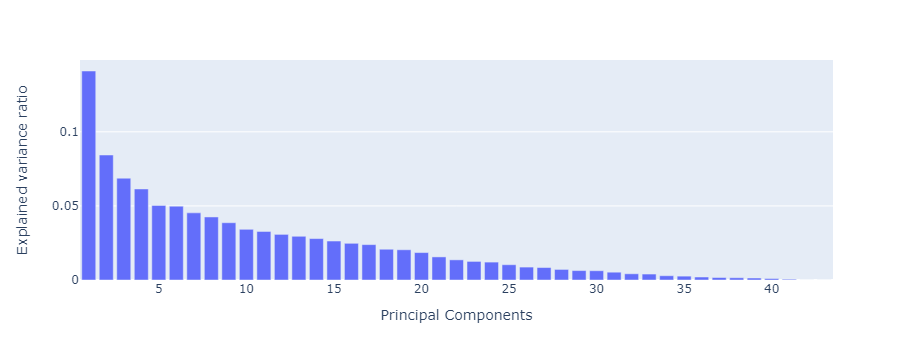

In [25]:
# Applying pca on reduce feature dataset
pca = PCA() 
pca.fit(X_reduce)
fig = px.bar(x=[i + 1 for i in range(len(pca.explained_variance_ratio_))],
             y=pca.explained_variance_ratio_,labels={"x":"Principal Components","y":"Explained variance ratio"})
fig.show()

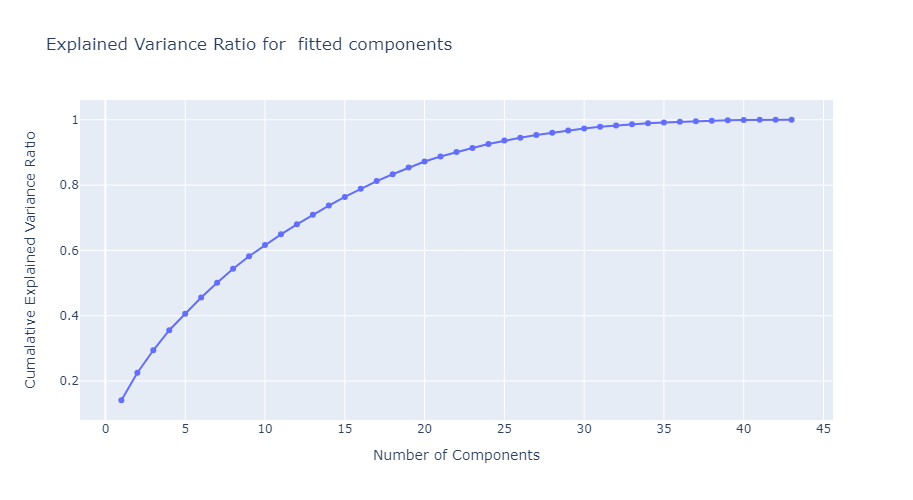

In [26]:
fig = px.line(x=[i + 1 for i in range(len(pca.explained_variance_ratio_))],
              y=pca.explained_variance_ratio_.cumsum(),title = 'Explained Variance Ratio for \nfitted components',
              labels={"x":"Number of Components","y":"Cumalative Explained Variance Ratio"},height=500,width=1000,markers=True
              )
fig.show()

It is recommended that approx 80% variance of data should be preserved and from above line plot , 15 PCA components are able to capture that much variance<br> So we reduce dimensionality further by projecting the above reduced 43 features into 15 Principal components

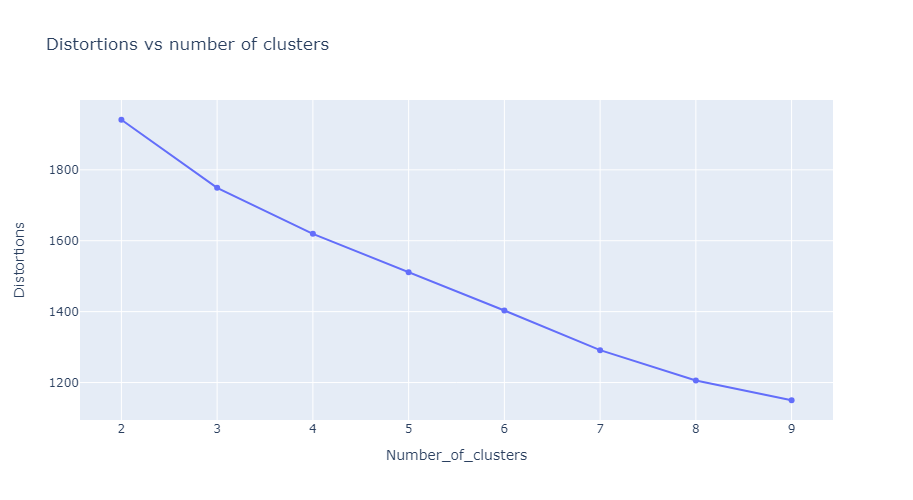

In [27]:
pca_15 = PCA(n_components=15,random_state = 42)
pca_15_transform_df = pca_15.fit_transform(X_reduce)

wcss = [] # empty list to store distortions fr fdiffernt number of clusters
values = range(2,10)
li = []
for k in values:
    kmm = KMeans(n_clusters=k,random_state=42)
    kmm.fit(pca_15_transform_df)
    wcss.append(kmm.inertia_)
    li.append(f"For n_clusters = {k},inertia :{kmm.inertia_}")
    
    
    
fig = px.line(x=values, y=wcss,title = 'Distortions vs number of clusters',
              labels={"x":"Number_of_clusters","y":"Distortions"},
              height=500,width=900,markers=True)
fig.show()

In [28]:
sl = []
# values = range(2,50)
for k in values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    predict = kmeans.fit_predict(pca_15_transform_df)
    score = silhouette_score(pca_15_transform_df,predict,random_state=1)
    sl.append(score)
    # print(f"For n_clusters = {k},silhouette score :{score}")

In [29]:
fig = px.line(x=values, y=sl,title = 'silhouette score',
              labels={"x":"number_of_clusters","y":"silhouette score"},
              height=500,width=1000,text=values)
fig.show()

From analysis by looking the graphs above  we can see that after reducing our features from 203 to just 15
we are getting the same result of 7 clusters

Here we lost 20% of the information and still got the decent result


Now KMeans is applied on the reduced feature dataset to find the optimal number of segments/clusters

In [30]:
# Applying KMEANS clustering to reduced feature dataset
kmean = KMeans(n_clusters=7)
labels = kmean.fit_predict(pca_15_transform_df)
labels

array([2, 2, 5, 2, 2, 4, 2, 1, 5, 4, 5, 4, 5, 4, 5, 0, 3, 0, 3, 5, 2, 4,
       1, 2, 2, 5, 4, 0, 4, 2, 4, 4, 6, 0, 0, 2, 4, 5, 2, 2, 5, 1, 3, 4,
       3, 5, 3, 1, 2, 3, 3, 5, 6, 2, 2, 1, 3, 0, 2, 2, 2, 3, 5, 4, 1, 3,
       3, 0, 0, 0])

In [31]:
x = pca_15_transform_df[:,0]
y = pca_15_transform_df[:,1]
sns.scatterplot(x = x,y = y,hue=labels,palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')

# fig = px.scatter(x=x, y=y, color=labels,height=500,width=500,labels={"x":"PC1","y":"PC2"})
# fig.show()

Text(0, 0.5, 'PC2')

From above plot,and analysis by using various feature selection and feature elimaination techniques, we are able to reduce the curse of dimensionality and reduce the feature space from 203 features to just 15 features and still able to segment the dataset into 7 clusters/ classes using Kmeans 


<br>

##### 3. After applying principal component analysis (PCA) on a given dataset, it was found that the percentage of variance for the first N components is X%. How is this percentage of variance computed?

Percentage of variance is computed using the explained_variance_ratio parameter on the fitted pca object

In [32]:
print(f"Precentage of variance explained by first 70 components:{round(pca.explained_variance_ratio_[:].sum(),2) * 100}%")
print(f"Precentage of variance explained by first 16 components:{round(pca.explained_variance_ratio_[:16].sum(),2) * 100}%")
print(f"Precentage of variance explained by first 2 components:{round(pca.explained_variance_ratio_[:3].sum(),2) * 100}%")

Precentage of variance explained by first 70 components:100.0%
Precentage of variance explained by first 16 components:79.0%
Precentage of variance explained by first 2 components:28.999999999999996%


<br>

<br>

##### Part B

#### Dataset description: 
This dataset includes data for the estimation of obesity levels in individuals based on their eating habits and physical condition. The data contains 17 attributes and 2111 records

##### 4. Create a machine learning (ML) model for predicting “weight” using all features except “NObeyesdad” and report observed performance. Explain your results based on following criteria:<br>
a. What model have you selected for solving this problem and why?<br>
b. Have you made any assumption for the target variable? If so, then why?<br>
c. What have you done with text variables? Explain.<br>
d. Have you optimized any model parameters? What is the benefit of this action?<br>
e. Have you applied any steps for handling overfitting or underfitting issues? What is that?

##### a. What model have you selected for solving this problem and why?

In this Problem,Aim is to predict the weight of the person based on certian predictor variables,this defines this as Regression probelm and for this we will be applying various supervised regresson algorthms and based ono the performace of the model we will select the final model

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('ObesityDataSet.csv')
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [35]:
df.shape

(2111, 17)

In [36]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [38]:
sns.displot(df['Age'],bins = 20)

C:\Users\harpr\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning:

The figure layout has changed to tight



##### b. Have you made any assumption for the target variable? If so, then why?

The Target variable is Weight and it is correlated with the predictor variables. So Linear regression is suitable to be applied on this first

In [39]:
sns.scatterplot(y=df['Weight'],x = df['Height'],)

<Axes: xlabel='Height', ylabel='Weight'>

From above plot , It seems that Weight(Target) and Height(Predictor) are correlated to each other<br>Further assumption to be considered:--<br>The observations are independent of each other.<br>The errors follow a normal distribution.<br>The independent variables are not highly correlated with each other.<br>Homoscedasticity: The variance of the errors is constant across all levels of the independent variables

In [40]:
df['Weight'].corr(df['Height'])

0.4631361166156269

In [41]:
sns.heatmap(df.corr(),annot = True)

<Axes: >

In [42]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [43]:
# import plotly.express as px
# # df = px.data.tips()
# plt.figure(figsize=(12,6))
# fig = px.histogram(df, x="Weight", color="Gender", marginal="rug")
# fig.show()

In [44]:
df = df.drop(columns = ['NObeyesdad'])
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation

<br>

##### c. What have you done with text variables? Explain.

The columns which are not numerical will be converted to numeric columns using pd.get_dummies functions so that machine learning algorith can treat those variables

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [46]:
print(f"Text variable columns :\n{list(df.select_dtypes(include=['object','category']).columns)}")

Text variable columns :
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [47]:
df_converted = pd.get_dummies(df,drop_first=True)
df_converted.head()

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Male  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0            0   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0            0   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0            1   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0            1   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0            1   

   family_history_with_overweight_yes  ...  CAEC_no  SMOKE_yes  SCC_yes  \
0                                   1  ...        0          0        0   
1                                   1  ...        0          1        1   
2                                   1  ...        0          0        0   
3                                   0  ...        0          0        0   
4                                   0  ...        0          0        0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0                0               0        1            0                 0   
1                0               1        0            0                 0   
2                1               0        0            0                 0   
3                1               0        0            0                 0   
4                0               1        0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             1               0  
2                             1               0  
3                             0               1  
4                             1               0  

[5 rows x 23 columns]

In [48]:
df_converted.shape

(2111, 23)

In [49]:
# Preprocessing the data to create models
X = df_converted.drop(columns = ['Weight'])
y = df_converted['Weight']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
# Creating a function to create model and report performance metrics
Name = []
training_score = []
testing_score = []
Mean_absolute_error = []
Root_Mean_absolute_error = []
def create_model(model_name,model,X_train,y_train,X_test,y_test):

    
    print(f"Using {model_name}")
    model.fit(X_train,y_train)
    print(f"Model score on training Data:{model.score(X_train,y_train)}")
    
    y_pred = model.predict(X_test)
    print(f"Model score on testing Data:{model.score(X_test,y_test)}")
    
    print(f"Mean_absolute_error: {mean_absolute_error(y_test,y_pred)}")
    print(f"Root_Mean_squared_error: {mean_squared_error(y_test,y_pred,squared=False)}")
    
    Name.append(model_name)
    training_score.append(model.score(X_train,y_train))
    testing_score.append(model.score(X_test,y_test))
    Mean_absolute_error.append(mean_absolute_error(y_test,y_pred))
    Root_Mean_absolute_error.append(mean_squared_error(y_test,y_pred,squared=False))
    
    return model

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<br>

##### d. Have you optimized any model parameters? What is the benefit of this action?

Here , we are going to create various regression models with their parameters being tuned/optimized for better results.This would help in getting good result on testing data 

In [55]:
lr = LinearRegression()
model = create_model('Linear_Regression',lr,X_train_scaled,y_train,X_test_scaled,y_test)

Using Linear_Regression
Model score on training Data:0.5808885596803982
Model score on testing Data:0.5828135132679231
Mean_absolute_error: 13.653608738653872
Root_Mean_squared_error: 17.155531640918152


In [56]:
ls = Lasso()
param = {'alpha':[0.1,0.5,1]}

skf = KFold(n_splits=5,shuffle=True)
grid = GridSearchCV(ls,param_grid=param,cv=skf,refit=True,verbose=1,return_train_score=True)
model = create_model('lasso',grid,X_train_scaled,y_train,X_test_scaled,y_test)
print(f"Best parameters for model:{model.best_params_}")
result = pd.DataFrame(model.cv_results_).sort_values(by = 'rank_test_score')
result[['params','mean_test_score','mean_train_score']].head()

Using lasso
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model score on training Data:0.5802176604982587
Model score on testing Data:0.5822939401233771
Mean_absolute_error: 13.710866378457993
Root_Mean_squared_error: 17.16621125333108
Best parameters for model:{'alpha': 0.1}


params  mean_test_score  mean_train_score
0  {'alpha': 0.1}         0.558384          0.581642
1  {'alpha': 0.5}         0.554537          0.574481
2    {'alpha': 1}         0.543102          0.560802

In [57]:
el = ElasticNet()
param = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

skf = KFold(n_splits=5,shuffle=True)

grid = GridSearchCV(el,param_grid=param,cv=skf,refit=True,verbose=1,return_train_score=True)
model = create_model("ElasticNet",grid,X_train_scaled,y_train,X_test_scaled,y_test)
print(f"Best parameters for model:{model.best_params_}")
result = pd.DataFrame(model.cv_results_).sort_values(by = 'rank_test_score')
result[['params','mean_test_score','mean_train_score']].head()

Using ElasticNet
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model score on training Data:0.5784871951019938
Model score on testing Data:0.5806723262284612
Mean_absolute_error: 13.76348204557237
Root_Mean_squared_error: 17.199500214860194
Best parameters for model:{'alpha': 0.1}


params  mean_test_score  mean_train_score
0  {'alpha': 0.1}         0.565800          0.579951
1  {'alpha': 0.2}         0.562454          0.574946
2  {'alpha': 0.3}         0.557300          0.568649
3  {'alpha': 0.4}         0.551693          0.561954
4  {'alpha': 0.5}         0.545924          0.555166

In [58]:
rf = RandomForestRegressor()

test = []
train = []
r = [3,4,5,6,7,8,9,10,11,12,13,14]
for t in r:
    rf = RandomForestRegressor(max_depth=t)
    rf.fit(X_train_scaled,y_train)
    y_pred = rf.predict(X_test_scaled)
    train.append(rf.score(X_train_scaled,y_train))
    test.append(rf.score(X_test_scaled,y_test))

plt.plot(r,train,label='train')
plt.plot(r,test,label='test')
plt.ylabel('score')
plt.xlabel('depth of tree')
plt.legend()

In [59]:
param = {'n_estimators':[100,200,250,300],
        'max_features' : ["auto", "sqrt", "log2"],
        'max_depth':[5,6,7,8,9]}

skf = KFold(n_splits=5,shuffle=True)

grid = GridSearchCV(rf,param_grid=param,cv=skf,refit=True,verbose=1,return_train_score=True)
model = create_model("Random_forest",grid,X_train_scaled,y_train,X_test_scaled,y_test)
print(f"Best parameters for model:{model.best_params_}")
result = pd.DataFrame(model.cv_results_).sort_values(by = 'rank_test_score')
result[['params','mean_test_score','mean_train_score']].head()

Using Random_forest
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Model score on training Data:0.9614081298279076
Model score on testing Data:0.8663450417519792
Mean_absolute_error: 6.213822864175021
Root_Mean_squared_error: 9.710276624135686
Best parameters for model:{'max_depth': 9, 'max_features': 'auto', 'n_estimators': 100}


params  mean_test_score  \
48  {'max_depth': 9, 'max_features': 'auto', 'n_es...         0.859221   
51  {'max_depth': 9, 'max_features': 'auto', 'n_es...         0.859104   
50  {'max_depth': 9, 'max_features': 'auto', 'n_es...         0.857884   
57  {'max_depth': 9, 'max_features': 'log2', 'n_es...         0.856880   
49  {'max_depth': 9, 'max_features': 'auto', 'n_es...         0.856354   

    mean_train_score  
48          0.963668  
51          0.963896  
50          0.963792  
57          0.930614  
49          0.963730

In [60]:
xg = XGBRegressor()
param = {'n_estimators':[100,200,250],
        # 'max_features' : ["auto", "sqrt", "log2"],
         'learning_rate':[0.1,0.05,0.2],
        'max_depth':[5,6,7,8,9]}

skf = KFold(n_splits=5,shuffle=True)

grid = GridSearchCV(xg,param_grid=param,cv=skf,refit=True,verbose=1,return_train_score=True)
model = create_model('XGBoost',grid,X_train_scaled,y_train,X_test_scaled,y_test)
print(f"Best parameters for model:{model.best_params_}")
result = pd.DataFrame(model.cv_results_).sort_values(by = 'rank_test_score')
result[['params','mean_test_score','mean_train_score']].head()

Using XGBoost
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Model score on training Data:0.9981127252125205
Model score on testing Data:0.8725395224306163
Mean_absolute_error: 5.808542445728975
Root_Mean_squared_error: 9.48258699213045
Best parameters for model:{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


params  mean_test_score  \
7   {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.890363   
8   {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.890311   
26  {'learning_rate': 0.05, 'max_depth': 8, 'n_est...         0.890064   
25  {'learning_rate': 0.05, 'max_depth': 8, 'n_est...         0.889516   
10  {'learning_rate': 0.1, 'max_depth': 8, 'n_esti...         0.888763   

    mean_train_score  
7           0.998714  
8           0.999360  
26          0.998198  
25          0.996847  
10          0.999701

In [61]:
gd = GradientBoostingRegressor()
param = {'n_estimators':[100,200,250,300,400],
         'learning_rate':[0.1,0.05,0.2],
        'max_depth':[5,6,7,8,9]}
        # 'max_depth':[3,4,5]}

skf = KFold(n_splits=5,shuffle=True)

grid = GridSearchCV(gd,param_grid=param,cv=skf,refit=True,verbose=1,return_train_score=True)
model = create_model('GradientBoostingRegressor',grid,X_train_scaled,y_train,X_test_scaled,y_test)
print(f"Best parameters for model:{model.best_params_}")
result = pd.DataFrame(model.cv_results_).sort_values(by = 'rank_test_score')
result[['params','mean_test_score','mean_train_score']].head()

Using GradientBoostingRegressor
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Model score on training Data:0.9996550407663248
Model score on testing Data:0.8683131457166835
Mean_absolute_error: 5.656004997996309
Root_Mean_squared_error: 9.638518307154278
Best parameters for model:{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250}


params  mean_test_score  \
12  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.884547   
13  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.882983   
37  {'learning_rate': 0.05, 'max_depth': 7, 'n_est...         0.882310   
11  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.881764   
34  {'learning_rate': 0.05, 'max_depth': 6, 'n_est...         0.881657   

    mean_train_score  
12          0.999837  
13          0.999930  
37          0.998056  
11          0.999602  
34          0.997535

In [62]:
ada= AdaBoostRegressor()
param = {'n_estimators':[50,100,200,300,400],
         'learning_rate':[0.005, 0.001, 0.01, 0.1, 1.0]}

skf = KFold(n_splits=5,shuffle=True)

grid = GridSearchCV(ada,param_grid=param,cv=skf,refit=True,verbose=1,return_train_score=True)
model = create_model('AdaBoosting',grid,X_train_scaled,y_train,X_test_scaled,y_test)
print(f"Best parameters for model:{model.best_params_}")
result = pd.DataFrame(model.cv_results_).sort_values(by = 'rank_test_score')
result[['params','mean_test_score','mean_train_score']].head()

Using AdaBoosting
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Model score on training Data:0.722815697590329
Model score on testing Data:0.6804841855699005
Mean_absolute_error: 12.624360221520202
Root_Mean_squared_error: 15.013613935246953
Best parameters for model:{'learning_rate': 1.0, 'n_estimators': 50}


params  mean_test_score  \
20   {'learning_rate': 1.0, 'n_estimators': 50}         0.697331   
19  {'learning_rate': 0.1, 'n_estimators': 400}         0.695563   
22  {'learning_rate': 1.0, 'n_estimators': 200}         0.695172   
18  {'learning_rate': 0.1, 'n_estimators': 300}         0.692304   
21  {'learning_rate': 1.0, 'n_estimators': 100}         0.691165   

    mean_train_score  
20          0.723666  
19          0.732502  
22          0.730378  
18          0.730851  
21          0.725933

In [63]:

df = pd.DataFrame({'Name':Name,'Training_Score':training_score,'Testing_score':testing_score,
              'Mean_absolute_error':Mean_absolute_error,
             'Root_Mean_absolute_error':Root_Mean_absolute_error})
df.sort_values(by = ['Testing_score'],ascending=False)

Name  Training_Score  Testing_score  \
4                    XGBoost        0.998113       0.872540   
5  GradientBoostingRegressor        0.999655       0.868313   
3              Random_forest        0.961408       0.866345   
6                AdaBoosting        0.722816       0.680484   
0          Linear_Regression        0.580889       0.582814   
1                      lasso        0.580218       0.582294   
2                 ElasticNet        0.578487       0.580672   

   Mean_absolute_error  Root_Mean_absolute_error  
4             5.808542                  9.482587  
5             5.656005                  9.638518  
3             6.213823                  9.710277  
6            12.624360                 15.013614  
0            13.653609                 17.155532  
1            13.710866                 17.166211  
2            13.763482                 17.199500

e. Have you applied any steps for handling overfitting or underfitting issues? What is that?

In order to handle overfitting/underfitting in developing the model, various techniques are performed to tacke this issue:-
1. Regularisation- is a technique to prevent the model from overfitting by adding extra information to it.
In regularization technique, we reduce the magnitude of the features by keeping the same number of features."
Ridge regression is one of regularization technique of linear regression in which a small amount of bias is introduced 
is a regularization technique, which is used to reduce the complexity of the model. It is also called as L2 regularization.
In this technique, the cost function is altered by adding the penalty term to it. The amount of bias added to the model is called Ridge Regression penalty<br>
Lasso regression is another regularization technique to reduce the complexity of the model. It stands for Least Absolute and Selection Operator.
It is similar to the Ridge Regression except that the penalty term contains only the absolute weights instead of a square of weights.
Since it takes absolute values, hence, it can shrink the slope to 0, whereas Ridge Regression can only shrink it near to 0.
It is also called as L1 regularization.

Lasso Regression is used abovealong with ElasticNet with Linear Regression<br>



2. Cross-validation -is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data. We can also say that it is a technique to check how a statistical model generalizes to an independent dataset.
K-fold cross-validation approach divides the input dataset into K groups of samples of equal sizes. These samples are called folds. For each learning set, the prediction function uses k-1 folds, and the rest of the folds are used for the test set. This approach is a very popular CV approach because it is easy to understand, and the output is less biased than other methods.<br>

This technique is used in all above trained models<br><br>

3. Ensemble learning is a machine learning technique that enhances accuracy and resilience in forecasting by merging predictions from multiple models. It aims to mitigate errors or biases that may exist in individual models by leveraging the collective intelligence of the ensemble.<br><br>
Adaptive boosting or AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly<br><br>
Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree<br><br>
Random Forest is another ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging meta estimator, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree
<br>
All above three ensemble learnig techniques were used in the above model training<br><br><br><br>
4. Hyperparameter Tuning  -there are parameters that are internally learned from the given dataset and derived from the dataset, they are represented in making predictions, classification and etc., These are so-called Model Parameters, and they are varying with respect to the nature of the data we couldn’t control this since it depends on the data.
Grid-Search: To implement the Grid-Search, we have a Scikit-Learn library called GridSearchCV. The computational time would be long, but it would reduce the manual efforts by avoiding the ‘n’ number of lines of code. Library itself perform the search operations and returns the performing model and its score. In which each model are built for each permutation of a given hyperparameter, internally it would be evaluated and ranked across the given cross-validation folds<br>
Grid Search Technique is also used in above models to have optimal hyperparameters 


In [64]:

df = pd.DataFrame({'Name':Name,'Training_Score':training_score,'Testing_score':testing_score,
              'Mean_absolute_error':Mean_absolute_error,
             'Root_Mean_absolute_error':Root_Mean_absolute_error})
df.sort_values(by = ['Testing_score'],ascending=False)

Name  Training_Score  Testing_score  \
4                    XGBoost        0.998113       0.872540   
5  GradientBoostingRegressor        0.999655       0.868313   
3              Random_forest        0.961408       0.866345   
6                AdaBoosting        0.722816       0.680484   
0          Linear_Regression        0.580889       0.582814   
1                      lasso        0.580218       0.582294   
2                 ElasticNet        0.578487       0.580672   

   Mean_absolute_error  Root_Mean_absolute_error  
4             5.808542                  9.482587  
5             5.656005                  9.638518  
3             6.213823                  9.710277  
6            12.624360                 15.013614  
0            13.653609                 17.155532  
1            13.710866                 17.166211  
2            13.763482                 17.199500


From above dataframe, we can see :-
Linear regression and LASSO performed poorly<br>
ADABoost regressor did a moderate job<br>
XGBOOST, GradientBoosting Regressor and Random Forest performed decent
But XGBOOST and Gradient Boosting overfits the data as they have almost 100% training
score<br>
Random Forest can be chosen as the final model for this as it is performing well both on
training as well as on testing data

In [65]:
rf = RandomForestRegressor(random_state=42)
param = {'n_estimators':[50,60,70,80,90,100],
         'min_samples_leaf':[1,2,3,4],
         'min_samples_split':[2,3,4],
        'max_features' : ["auto", "sqrt", "log2"],
        'max_depth':[3,4,5,6,7,8,9]}

skf = KFold(n_splits=5,shuffle=True)
grid = GridSearchCV(rf,param_grid=param,cv=skf,refit=True,verbose=1)
model = create_model("Random_forest",grid,X_train_scaled,y_train,X_test_scaled,y_test)
print(f"Best parameters for model:{model.best_params_}")

Using Random_forest
Fitting 5 folds for each of 1512 candidates, totalling 7560 fits
Model score on training Data:0.9605529166947031
Model score on testing Data:0.8645090332782871
Mean_absolute_error: 6.340485191965618
Root_Mean_squared_error: 9.776743822014172
Best parameters for model:{'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 90}


Random forest model was further optimzed to on various parameters such as n_estimators,max_depth,max_features etc to handle overfitting as well as underfitting <br>
The model is now showing decent score on training as well as on testing data

##### References

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/#5<br>https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/
https://hastie.su.domains/ISLP/ISLP_website.pdf<br>https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/<br>https://www.bioinformatics.babraham.ac.uk/training/10XRNASeq/Dimension%20Reduction.pdf<br>http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-t-sne.html<br>https://www.educba.com/density-based-clustering/<br>https://plotly.com/graphing-libraries/<br>https://seaborn.pydata.org/index.html<br>https://pypi.org/project/feature-engine/<br>https://www.datacamp.com/blog